# Importing Required Liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
df=pd.read_csv("Reliance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5730 non-null   object
 1   OPEN           5730 non-null   object
 2   HIGH           5730 non-null   object
 3   LOW            5730 non-null   object
 4   PREV. CLOSE    5730 non-null   object
 5   ltp            5730 non-null   object
 6   close          5730 non-null   object
 7   vwap           5730 non-null   object
 8   52W H          5730 non-null   object
 9   52W L          5730 non-null   object
 10  VOLUME         5730 non-null   object
 11  VALUE          5730 non-null   object
 12  No of trades   5730 non-null   object
dtypes: object(13)
memory usage: 582.1+ KB


In [4]:
df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,03-Jan-2000,237.5,251.7,237.5,233.05,251.7,251.7,249.37,269.0,116.05,"4,456,424","1,111,319,144.45",-
1,04-Jan-2000,258.4,271.85,251.3,251.7,271.85,271.85,263.52,269.0,116.05,"9,487,878","2,500,221,906.90",-
2,05-Jan-2000,256.65,287.9,256.65,271.85,286.75,282.5,274.79,271.85,116.05,"26,833,684","7,373,697,275.70",-
3,06-Jan-2000,289.0,300.7,289.0,282.5,293.5,294.35,295.45,287.9,116.05,"15,682,286","4,633,254,040.90",-
4,07-Jan-2000,295.0,317.9,293.0,294.35,314.5,314.55,308.91,300.7,116.05,"19,870,977","6,138,387,657.40",-


## Removing "52W H", "52W L", "Value" and "No of trades" columns

In [5]:
df=df[["Date ","OPEN ","HIGH ","LOW ","close ","vwap ", "VOLUME " ]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     5730 non-null   object
 1   OPEN     5730 non-null   object
 2   HIGH     5730 non-null   object
 3   LOW      5730 non-null   object
 4   close    5730 non-null   object
 5   vwap     5730 non-null   object
 6   VOLUME   5730 non-null   object
dtypes: object(7)
memory usage: 313.5+ KB


## Correcting Datatypes

In [7]:
df["Date "]=pd.to_datetime(df["Date "])
df["OPEN "]=df["OPEN "].str.replace(",","").astype(float)
df["HIGH "]=df["HIGH "].str.replace(",","").astype(float)
df["LOW "]=df["LOW "].str.replace(",","").astype(float)
df["close "]=df["close "].str.replace(",","").astype(float)
df["vwap "]=df["vwap "].str.replace(",","").astype(float)
df["VOLUME "]=df["VOLUME "].str.replace(",","").astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5730 non-null   datetime64[ns]
 1   OPEN     5730 non-null   float64       
 2   HIGH     5730 non-null   float64       
 3   LOW      5730 non-null   float64       
 4   close    5730 non-null   float64       
 5   vwap     5730 non-null   float64       
 6   VOLUME   5730 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 313.5 KB


## Adding Day, Month and Year column for better analysis

In [9]:
df["Year"]=df["Date "].dt.year
df["Month"]=df["Date "].dt.month_name()
df["Day"]=df["Date "].dt.day_name()

In [10]:
df

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
0,2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424.0,2000,January,Monday
1,2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878.0,2000,January,Tuesday
2,2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684.0,2000,January,Wednesday
3,2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286.0,2000,January,Thursday
4,2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977.0,2000,January,Friday
...,...,...,...,...,...,...,...,...,...,...
5725,2022-12-26,2514.75,2542.00,2492.40,2524.05,2523.81,2764496.0,2022,December,Monday
5726,2022-12-27,2530.00,2548.80,2515.25,2544.70,2534.62,2659749.0,2022,December,Tuesday
5727,2022-12-28,2538.00,2549.80,2521.50,2544.45,2537.68,3442509.0,2022,December,Wednesday
5728,2022-12-29,2527.00,2548.90,2525.50,2543.30,2536.86,3198493.0,2022,December,Thursday


In [11]:
df.describe()

,OPEN,HIGH,LOW,close,vwap,VOLUME,Year
count,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5.730000e+03,5730.000000
mean,1116.482845,1131.584738,1100.035707,1115.289092,1115.923068,5.667730e+06,2010.984991
std,665.244775,674.541543,654.287192,664.168719,664.355703,4.934427e+06,6.646587
min,205.500000,219.500000,197.150000,203.200000,212.290000,5.282000e+04,2000.000000
25%,700.450000,708.462500,693.012500,699.875000,700.140000,2.923922e+06,2005.000000
50%,972.000000,983.275000,961.450000,971.075000,972.290000,4.360652e+06,2011.000000
75%,1371.037500,1388.750000,1353.275000,1370.900000,1370.490000,6.703719e+06,2017.000000
max,3298.000000,3298.000000,3141.300000,3220.850000,3197.750000,6.523089e+07,2022.000000


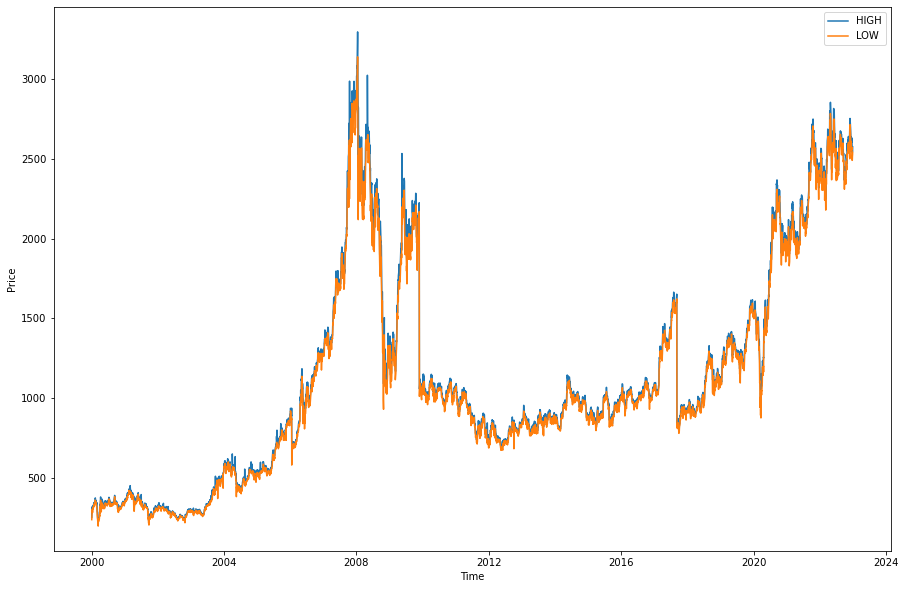

In [12]:
plt.figure(figsize=(15,10))
plt.plot(df["Date "],df["HIGH "],label="HIGH")
plt.plot(df["Date "],df["LOW "],label="LOW")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

In [13]:
df.head(30)

,Date,OPEN,HIGH,LOW,close,vwap,VOLUME,Year,Month,Day
0,2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424.0,2000,January,Monday
1,2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878.0,2000,January,Tuesday
2,2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684.0,2000,January,Wednesday
3,2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286.0,2000,January,Thursday
4,2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977.0,2000,January,Friday
5,2000-01-10,317.40,318.70,305.30,308.50,312.35,13417057.0,2000,January,Monday
6,2000-01-11,307.95,310.95,283.85,288.50,296.40,12544322.0,2000,January,Tuesday
7,2000-01-12,289.00,305.00,282.15,301.70,294.57,12109507.0,2000,January,Wednesday
8,2000-01-13,306.00,316.40,304.10,311.85,311.79,17076042.0,2000,January,Thursday
9,2000-01-14,309.50,321.65,309.50,316.30,316.17,13460592.0,2000,January,Friday


# Our objective is to forecast how `HIGH` the price can go, so that we can decide whether to invest or not

In [14]:
def monthly_conversion(data):
    monthly_data=data.copy()
    monthly_data["Date "]=monthly_data["Date "].apply(lambda x: str(x)[:-12])
    monthly_data=monthly_data.groupby("Date ")["HIGH "].max().reset_index()
    monthly_data["Date "] = pd.to_datetime(monthly_data["Date "])
    return monthly_data

In [15]:
monthly_high_data=monthly_conversion(df.iloc[20:,:4])

In [16]:
monthly_high_data

,Date,HIGH
0,2000-02-01,374.00
1,2000-03-01,329.85
2,2000-04-01,380.00
3,2000-05-01,356.80
4,2000-06-01,354.65
...,...,...
270,2022-08-01,2676.90
271,2022-09-01,2629.70
272,2022-10-01,2560.95
273,2022-11-01,2745.45


Text(0, 0.5, 'Price')

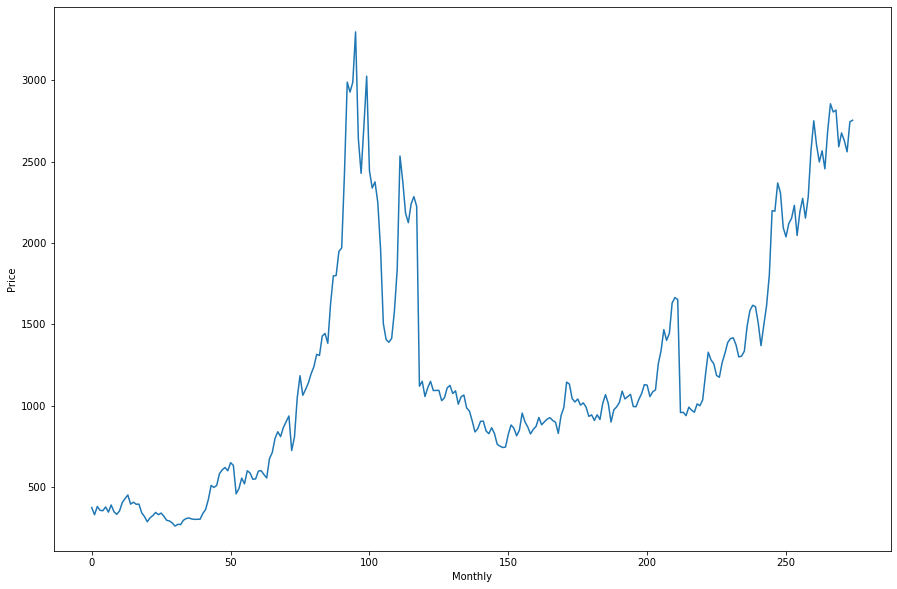

In [17]:
plt.figure(figsize=(15,10))
plt.plot(monthly_high_data["HIGH "])
plt.xlabel("Monthly")
plt.ylabel("Price")


# Differencing in series

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

- In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

In [18]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(monthly_high_data["HIGH "])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.271115
p-value: 0.642282


The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

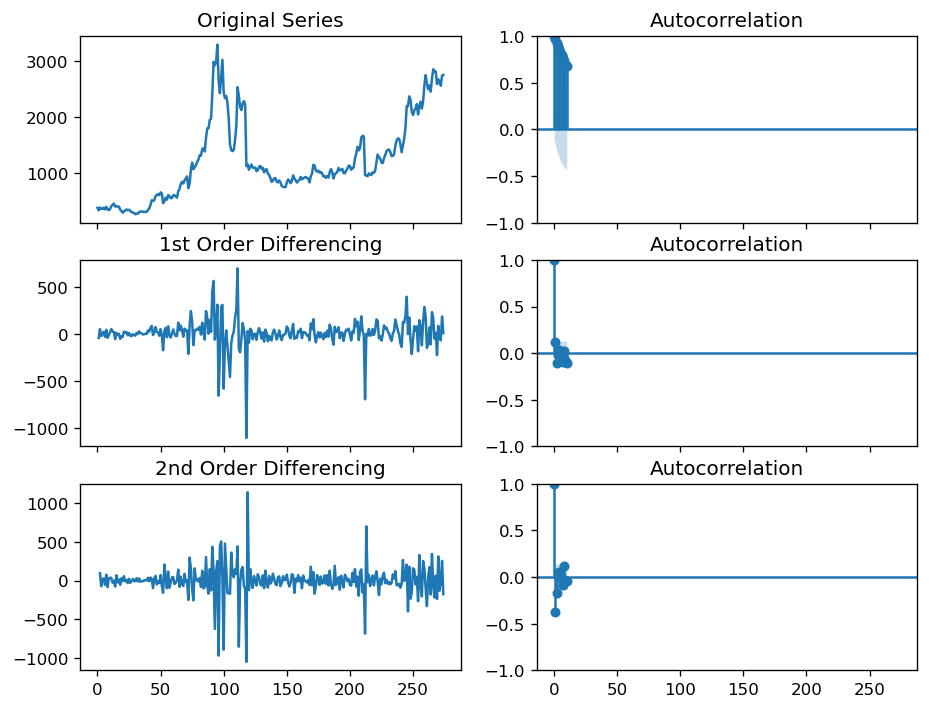

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(monthly_high_data["HIGH "])
axes[0, 0].set_title('Original Series')
plot_acf(monthly_high_data["HIGH "],lags=10, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(monthly_high_data["HIGH "].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(monthly_high_data["HIGH "].diff().dropna(),lags=10, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(monthly_high_data["HIGH "].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(monthly_high_data["HIGH "].diff().diff().dropna(),lags=10, ax=axes[2, 1])

plt.show()

In [35]:
# Calculate difference in prices month over month
def get_diff(data,diff):
    data['High_Stationary'] = data["HIGH "].diff(diff)    
    data = data.dropna()      
    return data
stationary_df = get_diff(monthly_high_data,2)

Text(0, 0.5, 'Price')

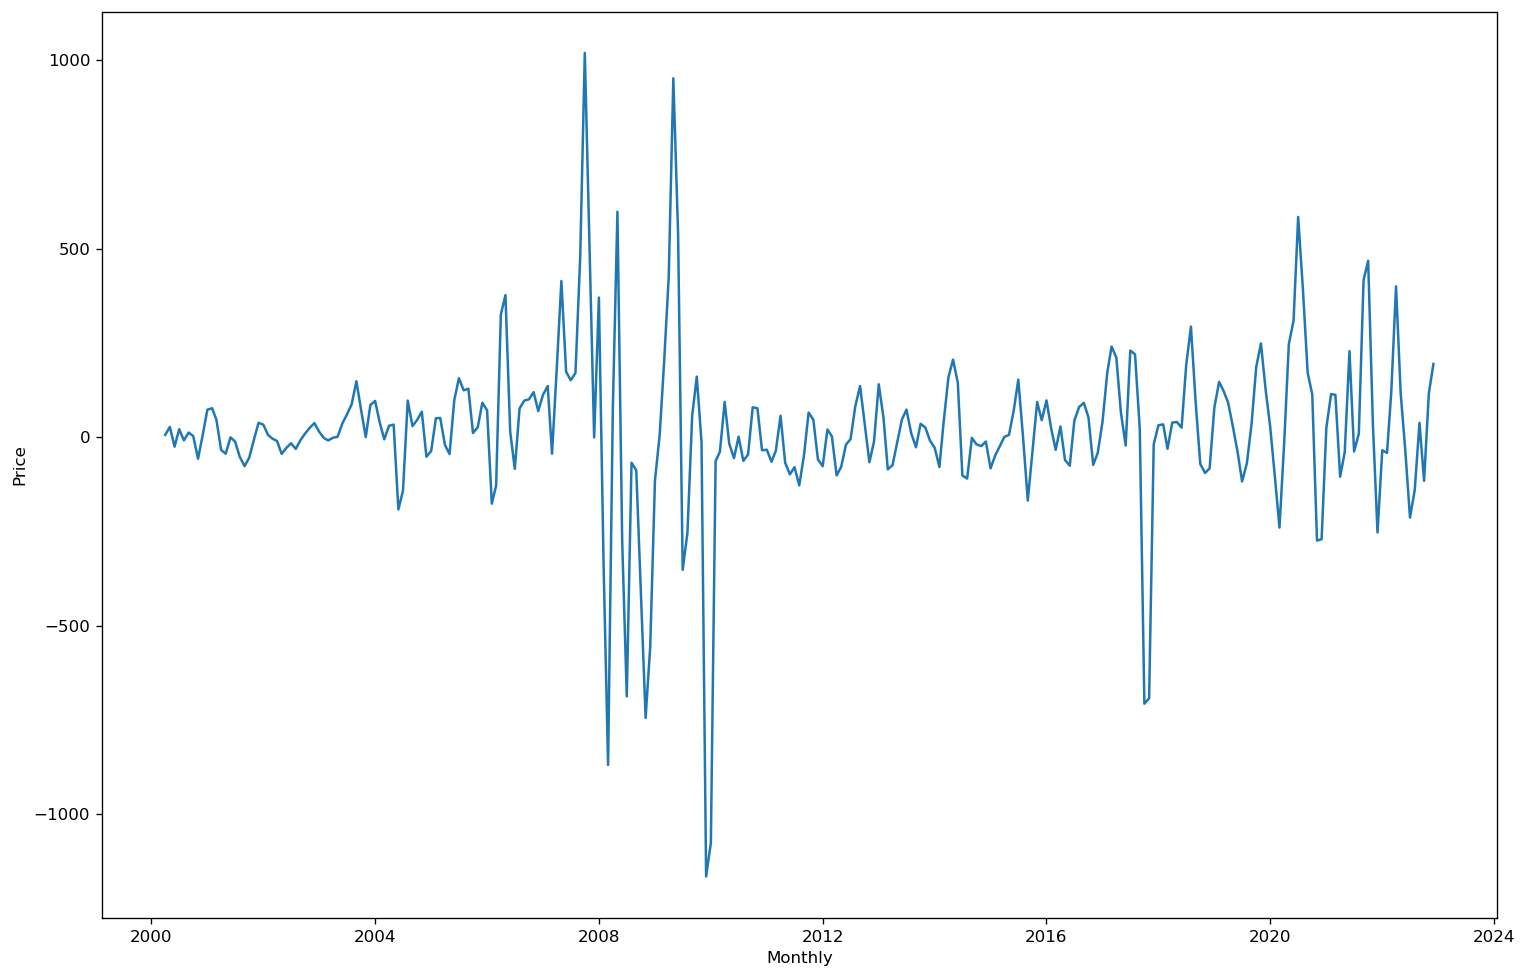

In [36]:
plt.figure(figsize=(15,10))
plt.plot(stationary_df['Date '],stationary_df["High_Stationary"])
plt.xlabel("Monthly")
plt.ylabel("Price")


In [37]:
stationary_df.head()

,Date,HIGH,High_Stationary
2,2000-04-01,380.00,6.00
3,2000-05-01,356.80,26.95
4,2000-06-01,354.65,-25.35
5,2000-07-01,377.70,20.90
6,2000-08-01,346.00,-8.65


In [51]:
## Data for arima model
arima_df=stationary_df[["Date ","High_Stationary","HIGH "]]

In [52]:
arima_df.head()

,Date,High_Stationary,HIGH
2,2000-04-01,6.00,380.00
3,2000-05-01,26.95,356.80
4,2000-06-01,-25.35,354.65
5,2000-07-01,20.90,377.70
6,2000-08-01,-8.65,346.00


# To check how many months to take as feature for Modeling let's see **Autocorrelation plot and Partial autocorrelation** 

In [53]:
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('Date ')
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()



E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


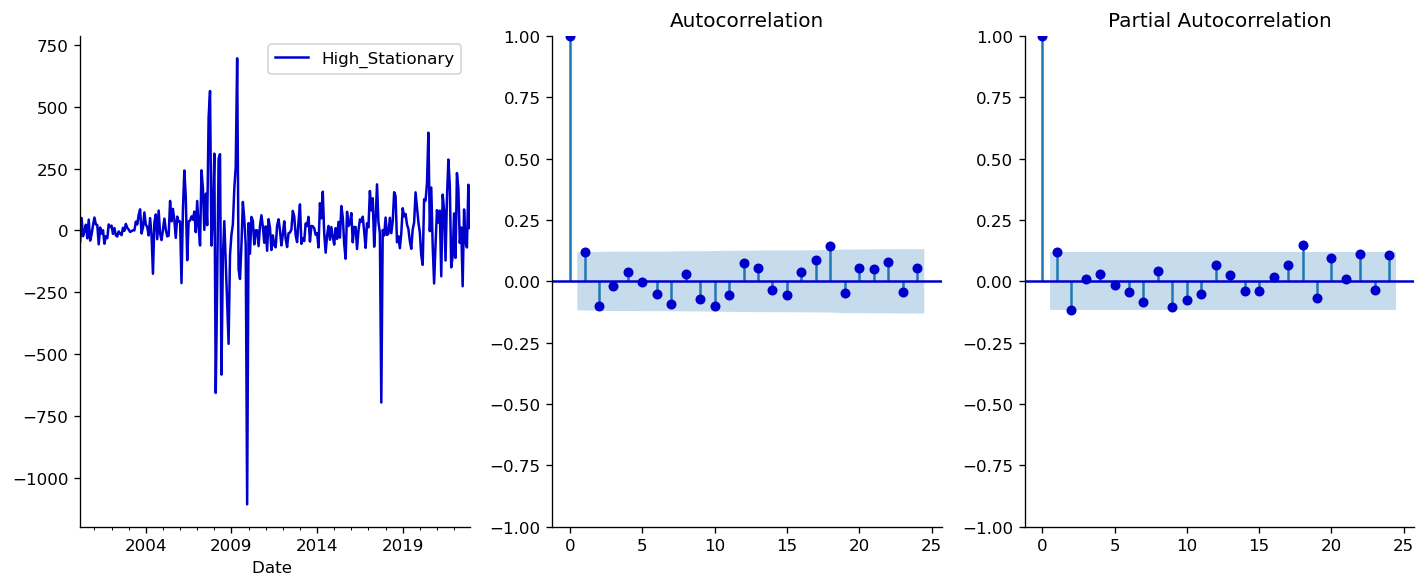

In [54]:
plots(get_diff(monthly_high_data,1).drop(columns=["HIGH "]), lags=24);

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


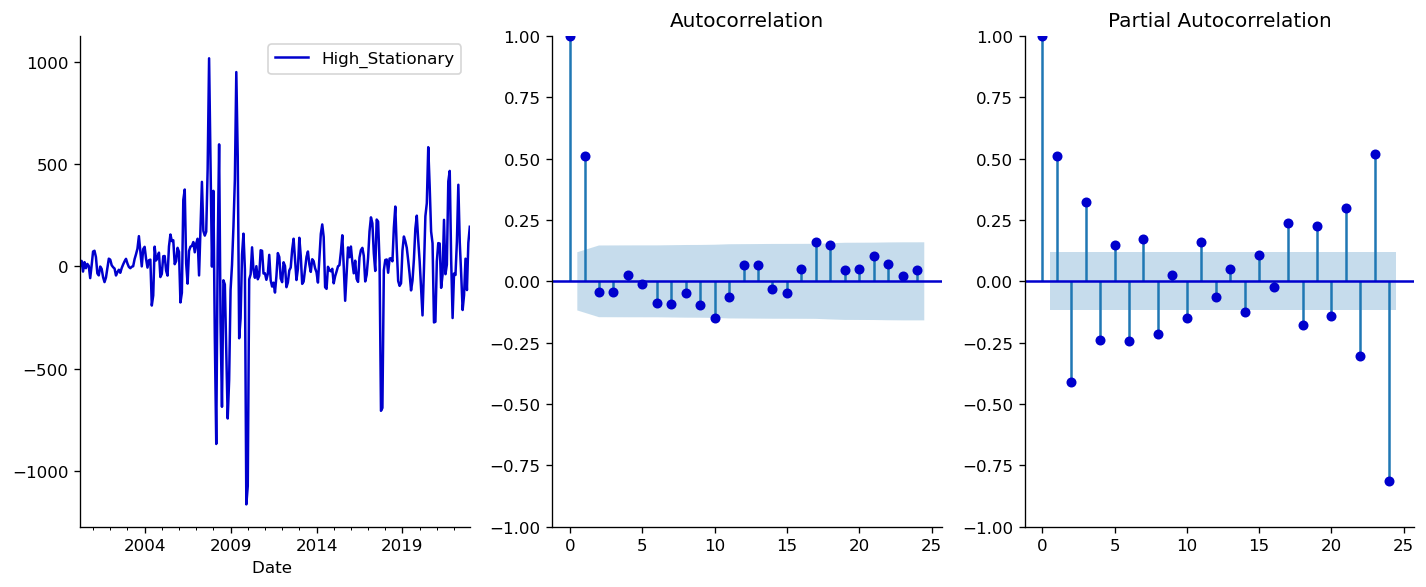

In [55]:
plots(get_diff(monthly_high_data,2).drop(columns=["HIGH "]), lags=24);

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


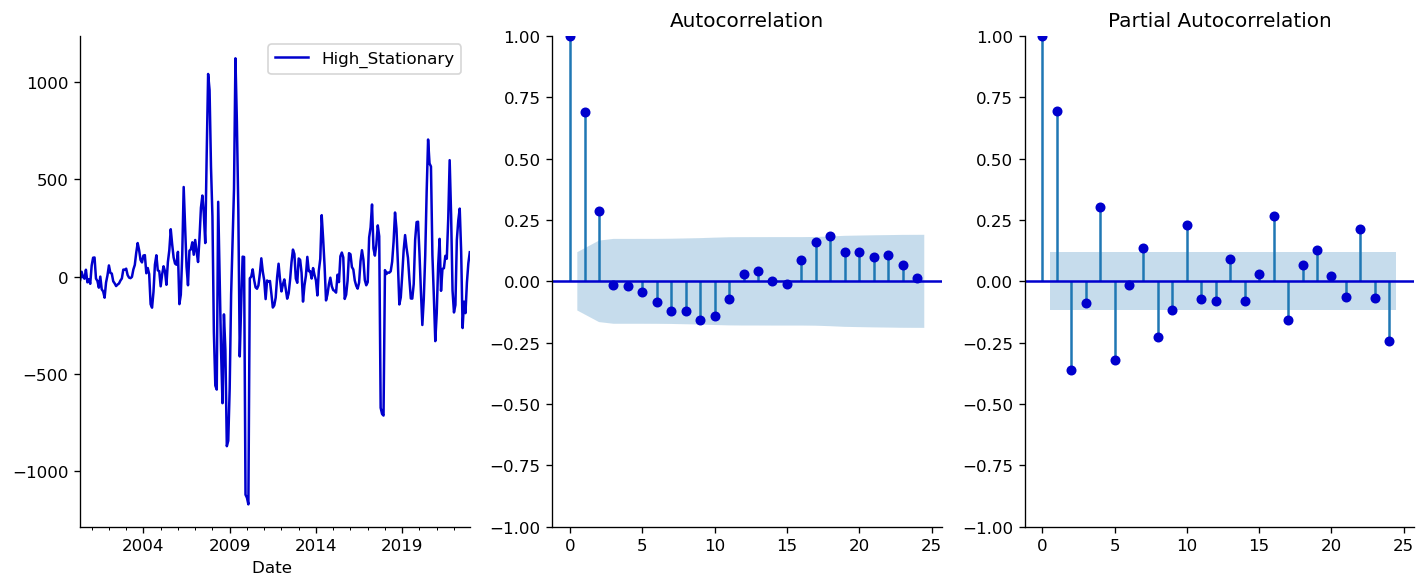

In [56]:
plots(get_diff(monthly_high_data,3).drop(columns=["HIGH "]), lags=24);

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


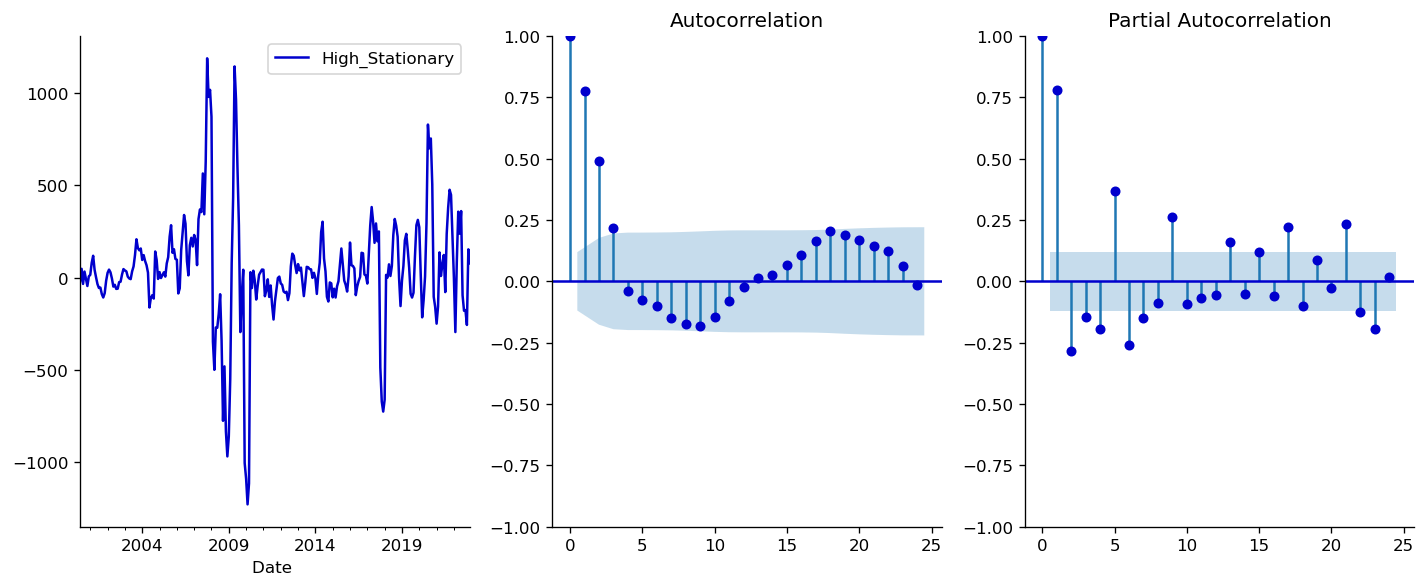

In [57]:
plots(get_diff(monthly_high_data,4).drop(columns=["HIGH "]), lags=24);

# Looking to autocorrelation and partial autocorrelation plot we will choose look back of 2 months

In [58]:
# create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,3):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['High_Stationary'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    # supervised_df.to_csv('../data/model_df.csv', index=False)
    
    return supervised_df

In [59]:
supervised_df=generate_supervised(arima_df)


In [60]:
supervised_df.head()

,Date,High_Stationary,HIGH,lag_1,lag_2
0,2000-06-01,-25.35,354.65,26.95,6.00
1,2000-07-01,20.90,377.70,-25.35,26.95
2,2000-08-01,-8.65,346.00,20.90,-25.35
3,2000-09-01,12.10,389.80,-8.65,20.90
4,2000-10-01,2.50,348.50,12.10,-8.65


In [61]:
arima_df.head()

,Date,High_Stationary,HIGH
2,2000-04-01,6.00,380.00
3,2000-05-01,26.95,356.80
4,2000-06-01,-25.35,354.65
5,2000-07-01,20.90,377.70
6,2000-08-01,-8.65,346.00


In [62]:
arima_df.to_csv("Arima_data.csv",index=False)

In [63]:
supervised_df.to_csv("Regression_data.csv",index=False)